<a href="https://colab.research.google.com/github/GOLISHYAMP/Colab_Notebooks/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 1000, n_features = 2, centers = 3, random_state=31, shuffle = True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 31)

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

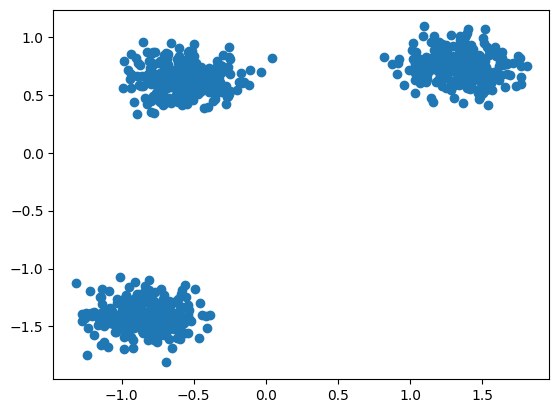

In [7]:
plt.scatter(x = X_train_scaled[:, 0], y = X_train_scaled[:, -1])

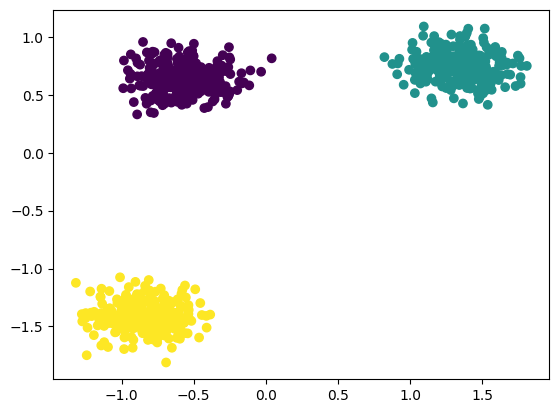

In [8]:
plt.scatter(x = X_train_scaled[:, 0], y = X_train_scaled[:, -1], c = y_train)

In [9]:
from sklearn.cluster import KMeans
WCSS = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init = "k-means++")
  kmeans.fit(X_train_scaled)
  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [10]:
WCSS

[1600.0000000000016,
 529.9318651012284,
 41.44516767939335,
 34.91538192096087,
 28.51015183912544,
 22.364220015734624,
 20.391530031818405,
 18.452501937288517,
 16.761062541070174,
 15.349705904191426]

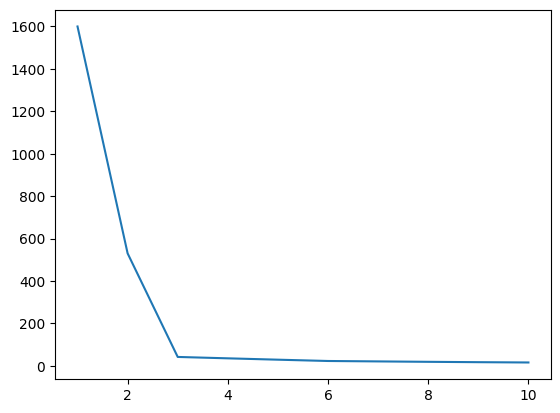

In [12]:
plt.plot(range(1,11), WCSS)

# **So, from the above graph the best value for clustering is 3. But lets validate weather we can go with 3 or not**

Before that lets check whether 3 is working or not by prediction

In [14]:
kmeans = KMeans(n_clusters=3, init = 'k-means++')
kmeans.fit(X_train_scaled)
y_pred = kmeans.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
y_pred

array([1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0,
       0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2,
       0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0,
       1, 0], dtype=int32)

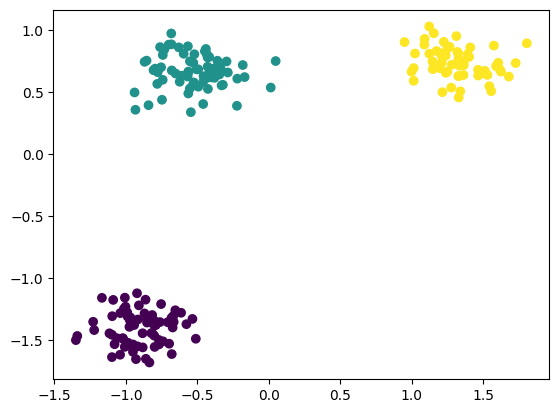

In [16]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, -1], c = y_pred)

## **Yes, it means our model is working perfectly by K value = 3, but still sometime by just looking at elbow method we cannot decide which k value is best.**

In [17]:
#Validating the K value
#Kneelocator
#Silhoutee scoring

In [18]:
# Kneelocator
!pip install kneed

In [19]:
from kneed import KneeLocator
k1 = KneeLocator(range(1,11), WCSS, curve = 'convex', direction = 'decreasing')
k1.elbow

3

In [25]:
# Silhoutte Scoring
from sklearn.metrics import silhouette_score
silhoutte_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init = "k-means++")
  kmeans.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled, kmeans.labels_)
  silhoutte_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [26]:
silhoutte_scores

[0.6678295751622375,
 0.8533752876391464,
 0.6986813236307374,
 0.5449885183594246,
 0.3887367141585908,
 0.37299713424970143,
 0.3602785148323545,
 0.32689531986633036,
 0.3364057285159609]

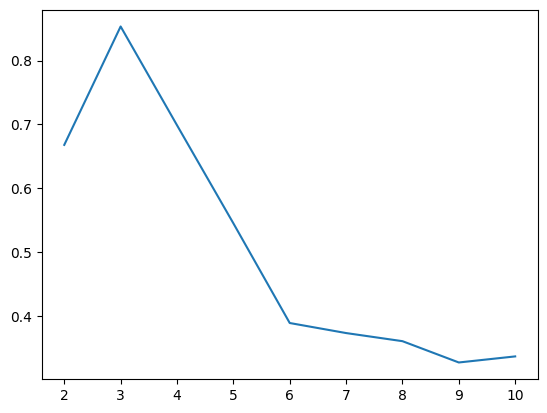

In [27]:
plt.plot(range(2, 11), silhoutte_scores)

# **So, in the above diagram we could clearly see that k value = 3, we got highest score. So, now we have validated that we can go with the k value as 3. **